## 2.1.8 Preparing a dataset for modeling

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

Data selected from [Kickstarter Projects](https://www.kaggle.com/kemical/kickstarter-projects)


<em>col descriptions:</em>

<ul>
    <li>usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter).</li>
<li>usd pledge real: conversion in US dollars of the pledged column (conversion from Fixer.io API).</li>
    <li>usd goal real: conversion in US dollars of the goal column (conversion from Fixer.io API).</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dec's data is messier, using jan instead
#dec = pd.read_csv('/Users/gemma/Documents/data science/DS bootcamp/kickstarter-projects/ks-projects-201612.csv', encoding='latin1', low_memory=False)
jan = pd.read_csv('/Users/gemma/Documents/data science/DS bootcamp/kickstarter-projects/ks-projects-201801.csv', encoding='latin1', low_memory=False)

#print(len(jan)) 
# dec len was 323750
# jan len 378661

# this was all relevant for the dec one, jan doesnt have the same problems
# there are 4 empty cols, erasing them
# getting the list of col names
#cols = dec.columns.values.tolist()
# and erasing the empty ones
#dec.drop(columns=cols[13:], inplace=True)

## renaming dec col names bc they are a mess
#print(cols)
#dec.rename(columns=lambda x: x.strip(), inplace=True)
#new_cols = dec.columns.values.tolist()
#print(new_cols)

print(jan.columns.values.tolist())


['ID', 'name', 'category', 'main_category', 'currency', 'deadline', 'goal', 'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']


In [2]:
jan.head(3)

#jan.dtypes 
# i was checking that the goal series was a numeric value - its a float

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00


In [3]:
# converting launched and deadline to datetime format so i can subtract them in a new col

jan['deadline'] = pd.to_datetime(jan['deadline'], errors='coerce')
jan['launched'] = pd.to_datetime(jan['launched'], errors='coerce')

jan['duration'] = jan['deadline'] - jan['launched']

jan['days_dur'] = jan['duration'].dt.days.astype(int)

jan.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,days_dur
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58 days 11:47:32,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,59 days 19:16:03,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,44 days 23:39:10,44


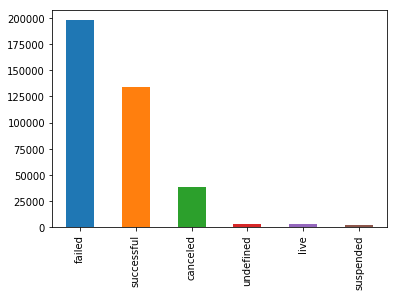

In [4]:
# outcome variable

jan['state'].value_counts().plot(kind='bar')

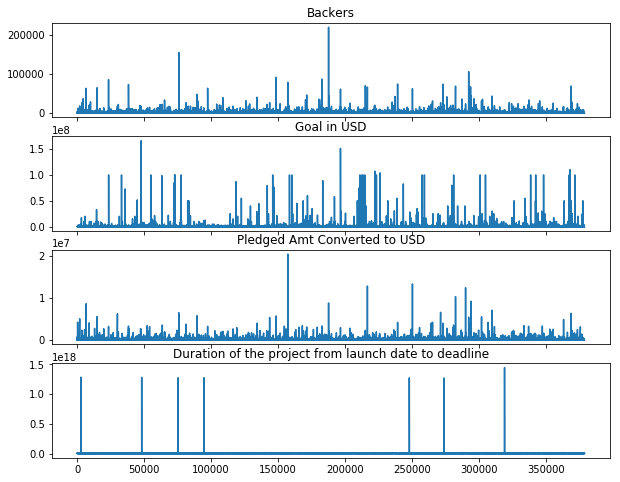

In [5]:
# 4 continuous variables

fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10, 8))

axs[0].plot(jan['backers'])
axs[0].set_title('Backers')

axs[1].plot(jan['usd_goal_real'])
axs[1].set_title('Goal in USD')

axs[2].plot(jan['usd_pledged_real'])
axs[2].set_title('Pledged Amt Converted to USD')

axs[3].plot(jan['duration'])
axs[3].set_title('Duration of the project from launch date to deadline')

#fig.tight_layout()
plt.show()

In [6]:
# to comparing #sfrom failed and successful projects

failed = jan[jan['state'] == 'failed']
success = jan[jan['state'] == 'successful']

print(max(success['backers']), max(failed['backers']))

219382 6550


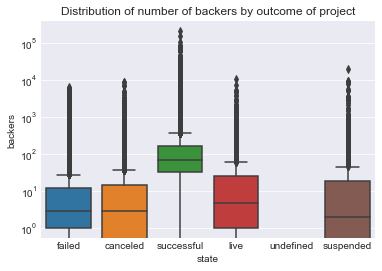

In [7]:
# going to make boxplots of backer #s from each to exclude outliers in the histogram
sns.set_style("darkgrid")

ax = sns.boxplot(x="state", y="backers", data=jan)
ax.set_yscale('log')
sns.color_palette(palette='cubehelix')
plt.title('Distribution of number of backers by outcome of project')
plt.show()


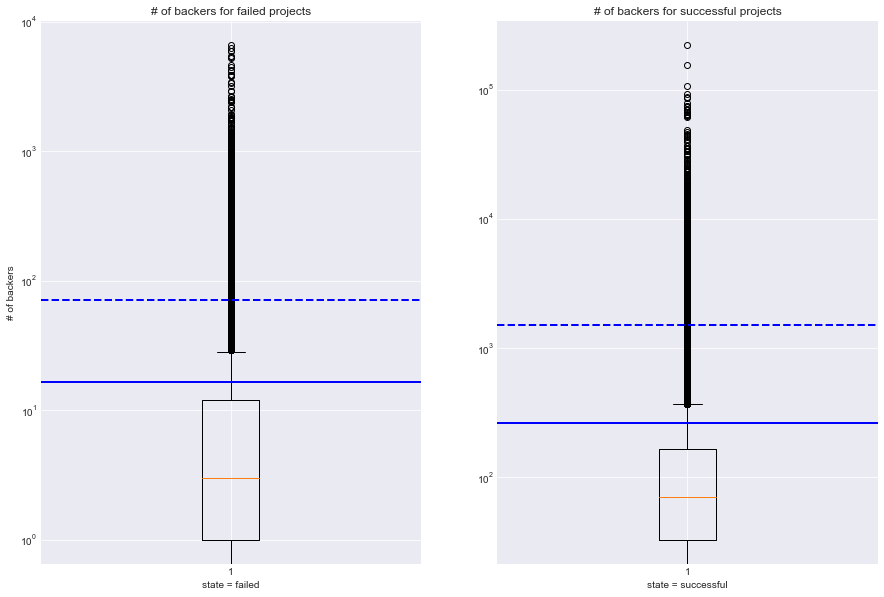

Means: 16.422351923689682, 263.92136223834694


In [8]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.boxplot(jan[jan['state'] == 'failed']['backers'])
plt.xlabel('state = failed')
plt.ylabel('# of backers')
plt.yscale('log')
plt.title('# of backers for failed projects')

# Add a horizontal line at the mean.
plt.axhline(failed['backers'].mean(), color='b', linestyle='solid', linewidth=2)

# Add a vertical line at the standard deviation above the mean.
plt.axhline(failed['backers'].std(), color='b', linestyle='dashed', linewidth=2)

plt.subplot(1,2,2)
plt.boxplot(jan[jan['state'] == 'successful']['backers'])
plt.xlabel('state = successful')
plt.yscale('log')
plt.title('# of backers for successful projects')

# Add a horizontal line at the mean.
plt.axhline(success['backers'].mean(), color='b', linestyle='solid', linewidth=2)

# Add a vertical line at the standard deviation above the mean.
plt.axhline(success['backers'].std(), color='b', linestyle='dashed', linewidth=2)

plt.show()


print('Means: {}, {}'.format(failed['backers'].mean(),success['backers'].mean()))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


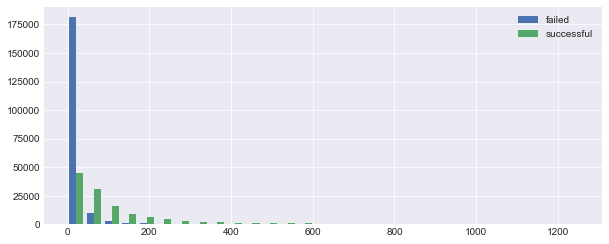

In [9]:
plt.style.use('seaborn-deep')

plt.figure(figsize=(10,4))
x = failed['backers']
y = success['backers']
bins = np.linspace(0, 1250, 30)

plt.hist([x, y], bins, label=['failed', 'successful'])
plt.legend(loc='upper right')
plt.show()

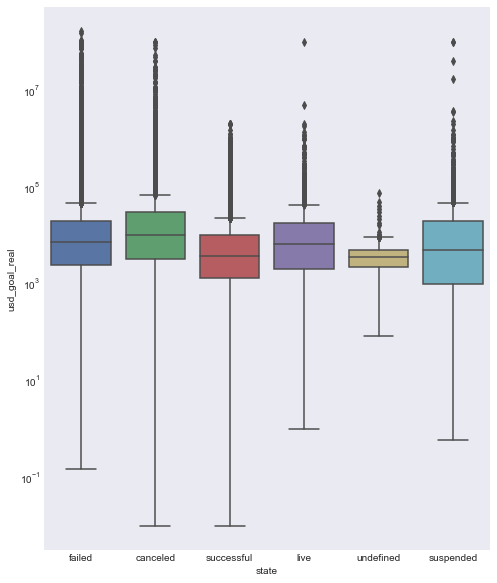

Max goal: 166361390.71


In [10]:
# get an idea of distribution of goal amounts (in USD)

# add subplot pre transformation

sns.set_style("dark")
plt.figure(figsize=(8,10))

ax = sns.boxplot(x="state", y="usd_goal_real", data=jan)
sns.color_palette(palette='cubehelix')
ax.set_yscale('log')
plt.show()

print('Max goal: {}'.format(max(jan['usd_goal_real'])))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


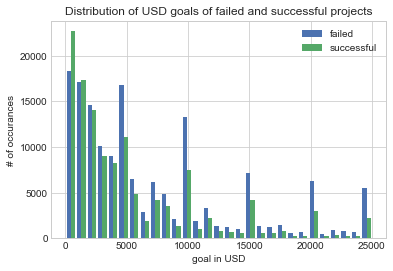

In [11]:
plt.style.use('seaborn-deep')
sns.set_style("whitegrid")
x = failed['usd_goal_real']
y = success['usd_goal_real']
bins = np.linspace(0, 25000, 30)

# change plot size a bit
plt.hist([x, y], bins, label=['failed', 'successful'])
plt.legend(loc='upper right')
plt.title('Distribution of USD goals of failed and successful projects')
plt.xlabel('goal in USD')
plt.ylabel('# of occurances')
plt.show()

In [12]:
# basic function to compare 2 cols in a df and see which one has the largest max
def get_max(df, cat1, cat2):
    if max(df[cat1].value_counts()) > max (df[cat2].value_counts()):
        return cat1, max(df[cat1]).value_counts()
    elif max(df[cat1].value_counts()) < max (df[cat2].value_counts()):
        return cat2, max(df[cat2].value_counts())
    else:
        return False
    
print(get_max(jan,'main_category','country'))

('country', 292627)


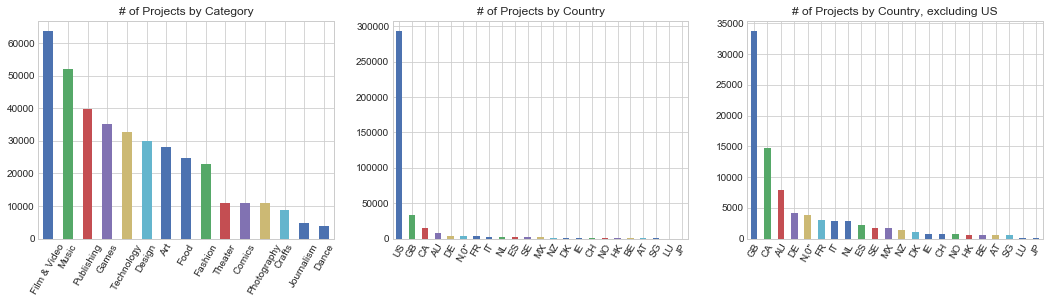

In [13]:
# both categorical 

plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
jan['main_category'].value_counts().plot(kind='bar')
#plt.ylim(max(jan['country'].value_counts())) 
#was doing this so looking at them next to each other is clear
plt.xticks(rotation=60)
plt.title('# of Projects by Category')

plt.subplot(1,3,2)
jan['country'].value_counts().plot(kind='bar')
plt.xticks(rotation=60)
plt.title('# of Projects by Country')

# just to actually see other than the US, bc the US has way more than any other country
plt.subplot(1,3,3)
jan['country'].value_counts()[1:].plot(kind='bar')
plt.xticks(rotation=60)
plt.title('# of Projects by Country, excluding US')
plt.show()


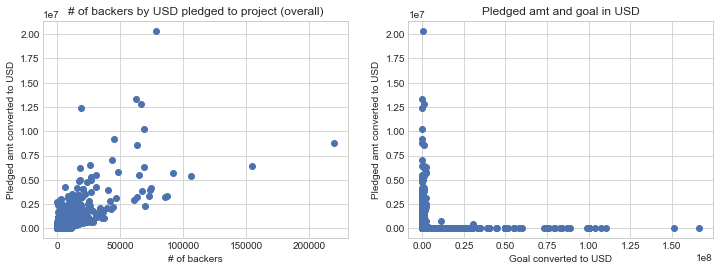

In [14]:
# bivariate data - 2 continuous data types

sns.set_style("whitegrid")
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(jan['backers'], jan['usd_pledged_real'])
plt.xlabel('# of backers')
plt.ylabel('Pledged amt converted to USD')
#plt.ylim
plt.title('# of backers by USD pledged to project (overall)')

plt.subplot(1,2,2)
plt.scatter(jan['usd_goal_real'], jan['usd_pledged_real'])
plt.xlabel('Goal converted to USD')
plt.ylabel('Pledged amt converted to USD')
plt.title('Pledged amt and goal in USD')
plt.show()

# maybe transform y scale first plot or y limit

In [15]:
# scatter plot matrix just for the continuous values selected above, and failed or successful

df_cont = jan.loc[
    ((jan['state'] == 'failed') | (jan['state'] == 'successful')) ,
    ['backers', 'usd_goal_real', 'usd_pledged_real','duration', 'state']]

df_cont['duration'] = df_cont['duration'].dt.days

df_cont.rename(columns={'duration':'duration_days'}, inplace=True)

df_cont.head(4)

,backers,usd_goal_real,usd_pledged_real,duration_days,state
0,0,1533.95,0.0,58,failed
1,15,30000.00,2421.0,59,failed
2,3,45000.00,220.0,44,failed
3,1,5000.00,1.0,29,failed


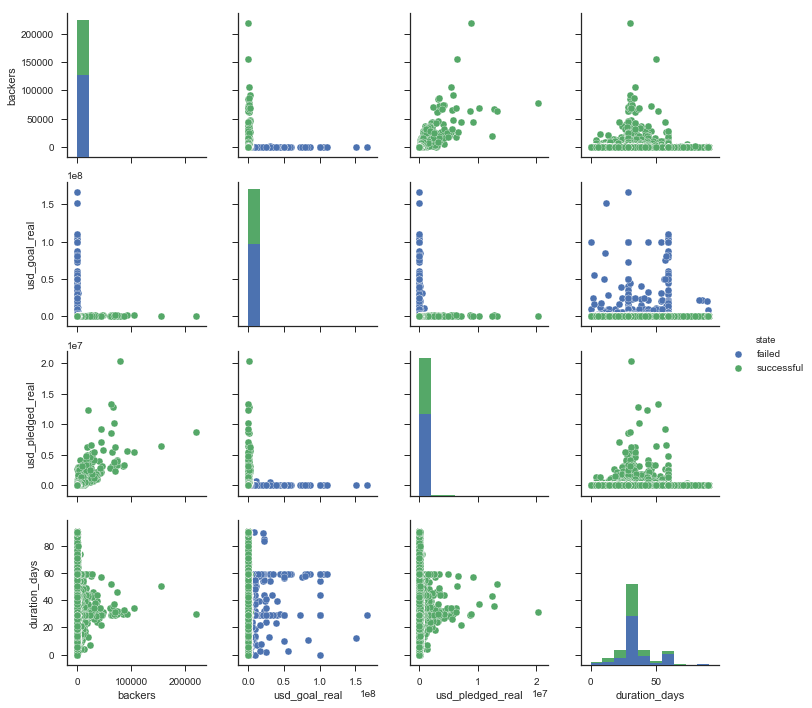

In [16]:
sns.set(style="ticks")

sns.pairplot(df_cont, hue="state")

In [17]:
corrmat = df_cont.corr()
print(corrmat)

                   backers  usd_goal_real  usd_pledged_real  duration_days
backers           1.000000       0.005208          0.752291      -0.000050
usd_goal_real     0.005208       1.000000          0.006354       0.021607
usd_pledged_real  0.752291       0.006354          1.000000       0.008651
duration_days    -0.000050       0.021607          0.008651       1.000000


<em>Expl of correlation matrix from thinkful: </em><br />
The correlation coefficient r is a numeric representation of the linear relationship between two continuous variables. Correlations range from -1 (as values in one variable go up, values in the other go down) to 0 (no relationship between the variables) to 1 (as values in one variable go up, values in the other go up as well).

In [18]:
# categorical variables 

# 'main_category'
# 'country'

# isolating them in a separate dataframe
df_cat = jan.loc[
    ((jan['state'] == 'failed') | (jan['state'] == 'successful')) ,
    ['main_category', 'country', 'state']]

df_cat.head(3)

,main_category,country,state
0,Publishing,GB,failed
1,Film & Video,US,failed
2,Film & Video,US,failed


In [19]:
def add_margin(ax,x=0.10,y=0.10):
    # This will, by default, add 10% to the x and y margins. You 
    # can customise this using the x and y arguments when you call it.

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xmargin = (xlim[1]-xlim[0])*x
    ymargin = (ylim[1]-ylim[0])*y

    ax.set_xlim(xlim[0]-xmargin,xlim[1]+xmargin)
    ax.set_ylim(ylim[0]-ymargin,ylim[1]+ymargin)
    
# from 
# https://stackoverflow.com/questions/34187970/setting-margins-in-matplotlib-seaborn-with-subplots?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

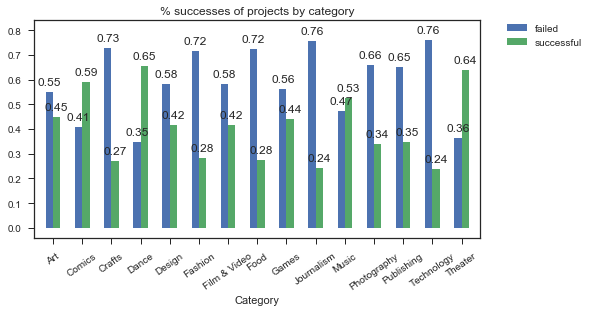

Ttest_indResult(statistic=-1.4268603361779166, pvalue=0.16467702660110911)

In [20]:
import scipy

# actual number
compare = df_cat.groupby('main_category')['state'].value_counts()

# average (normalized)
ax = df_cat.groupby('main_category')['state'].value_counts(normalize=True).unstack().plot(kind='bar',
                                                    figsize=(8,4))
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', 
    va='center', xytext=(0, 10), textcoords='offset points')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=35)
plt.xlabel('Category')
plt.title('% successes of projects by category')

# Update the limits using set_xlim and set_ylim
add_margin(ax,x=0.01,y=0.05) 

plt.show()

yes = df_cat[df_cat['state'] == 'successful']
no = df_cat[df_cat['state'] == 'failed']
scipy.stats.ttest_ind(yes.groupby('main_category')['state'].value_counts(), 
                      no.groupby('main_category')['state'].value_counts() )

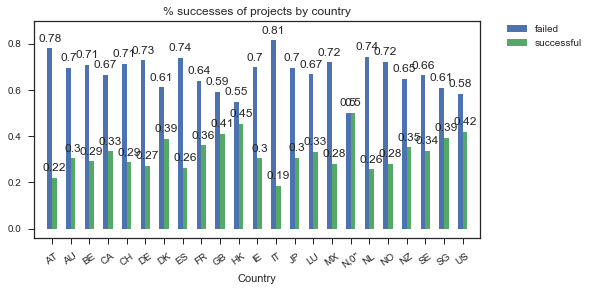

Ttest_indResult(statistic=-0.34239563996108141, pvalue=0.73368342311416135)

In [21]:
# average (normalized)
ax = df_cat.groupby('country')['state'].value_counts(normalize=True).unstack().plot(kind='bar',
                                                    figsize=(8,4))
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', 
    va='center', xytext=(0, 10), textcoords='offset points')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=35)
plt.xlabel('Country')
plt.title('% successes of projects by country')

# Update the limits using set_xlim and set_ylim
add_margin(ax,x=0.02,y=0.05) 

plt.show()

yes2 = df_cat[df_cat['state'] == 'successful']
no2 = df_cat[df_cat['state'] == 'failed']
scipy.stats.ttest_ind(yes2.groupby('country')['state'].value_counts(), 
                      no2.groupby('country')['state'].value_counts() )

In [22]:
jan['amt_pledged_per_backer'] = jan['usd_pledged_real'] / jan['backers']

jan['amt_pledged_per_backer'].fillna(value=0, inplace=True)

#(to_replace=NaN, value=0, inplace=False, limit=None, regex=False, method='pad', axis=None)[source]¶

jan.head(1)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,days_dur,amt_pledged_per_backer
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58 days 11:47:32,58,0.0


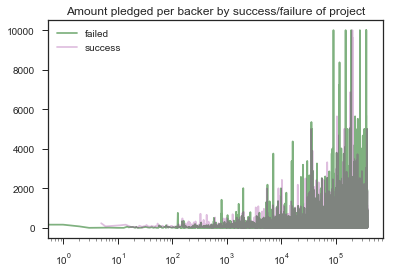

In [23]:

jan.loc[
    ((jan['state'] == 'failed') | (jan['state'] == 'successful')) ,
    ['main_category', 'country', 'state']]

allf = jan[jan['state'] == 'failed']
alls = jan[jan['state'] == 'successful']

allf['amt_pledged_per_backer'].plot(color='darkgreen', alpha=0.5, label='failed')
alls['amt_pledged_per_backer'].plot(color='purple', alpha=0.25, label='success')
plt.legend()
plt.xscale('log')
plt.title('Amount pledged per backer by success/failure of project')
plt.show()

# add explanations - what youre plotting (before), and what it shows (after)

In [24]:
here = df_cat.groupby('main_category')['state'].value_counts(normalize=True)

cats = jan['main_category'].unique().tolist()

for item in cats:
    if here[item, 'failed'] > .56:
        print('failed', item, here[item, 'failed'])
    else:
        print('success', item, here[item, 'successful'])

failed Publishing 0.652983495556
failed Film & Video 0.582093512835
success Music 0.526605584452
failed Food 0.724086333545
failed Design 0.584056142564
failed Crafts 0.729470452801
failed Games 0.561095333263
success Comics 0.591415266248
failed Fashion 0.717168141593
success Theater 0.637961335677
success Art 0.44889044889
failed Photography 0.658891526473
failed Technology 0.762144177449
success Dance 0.654352085083
failed Journalism 0.756085803808


## creating features

#1 - "main_category" (15 diff categories) <br />
this was statistically significant in the analysis above, so as a feature it should be relevant

#2 - "duration_49_days_or_less"<br />
the median duration of the campaigns was 49 days, so that seemed like a good day to split the category into

#3 - "usd_goal_5500_or_less" <br />
5500 was the median goal, and just 500 over the mode. from the data exploration above, it looked like projects with smaller goals were more successful (as a generalization), so splitting it at the median seemed like a good way to change that into a feature

#4 - "successful" <br />
whether or not the project was successful. one caveat is that incomplete (live) projects are thus indicated as not successful, which is important to remember when analyzing the data

#5, #6, #7 - "european", "north_american", "asia_aust" <br /> 
grouping the projects by country - grouped geographically. ie, european countries in one category, north american in another, and asian countries along with australia

#8 - "40+perbacker" <br />
categorized by amount pledged per backer, the median was 40 USD so split there

#9 - "105backers+"<br />
average number of backers was 105, cutting off at the average to compare projects w/ less backers to projects w/ more

#10 - "art_cat" <br />
split the main_categories from above into 2 sub categories. this could be used in place of the features for each category. 

<b>other (0)</b> = 'Publishing', 'Food', 'Crafts', 'Comics',  'Games', 'Technology', 'Journalism' <br />
<b>art (1)</b> = 'Film & Video', 'Music', 'Design', 'Fashion', 'Theater', 'Art', 'Photography', 'Dance'

In [25]:
# backers  usd_goal_real  usd_pledged_real  duration_days

features = pd.get_dummies(jan['main_category'])

In [26]:
features.head(3)

,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [27]:
max(jan['duration'].dt.days)

16738

In [28]:
import statistics

statistics.median(jan['duration'].dt.days.unique())

49

In [29]:
features['duration_49_days_or_less'] = np.where(jan['duration'].dt.days<=49, 1, 0)

In [30]:
features.head(3)

,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,duration_49_days_or_less
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [31]:
print(statistics.median(jan['usd_goal_real']), 
      max(jan['usd_goal_real']),min(jan['usd_goal_real']),
      statistics.mode(jan['usd_goal_real']))

5500.0 166361390.71 0.01 5000.0


In [32]:
features['usd_goal_5500_or_less'] = np.where(jan['usd_goal_real']<=5500, 1, 0)

In [33]:
features['successful'] = np.where(jan['state']=='successful', 1, 0)

In [34]:
jan['country'].unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

In [35]:
features['european'] = np.where((jan['country'].isin(['GB', 'NO', 'IT', 'DE', 'IE', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'DK', 'BE', 'LU'])),1,0)
features['north_american'] = np.where((jan['country'].isin(['US', 'CA', 'MX'])), 1,0)
features['asia_aust'] = np.where((jan['country'].isin([ 'CH', 'AT', 'HK', 'SG','JP'])),1,0)

In [36]:
print(statistics.median(jan['amt_pledged_per_backer']), 
      max(jan['amt_pledged_per_backer']),statistics.mean(jan['amt_pledged_per_backer']),
      statistics.mode(jan['amt_pledged_per_backer']))

features['40+perbacker'] = np.where(jan['amt_pledged_per_backer'] >= 40,1,0)

40.84183673469388 inf inf 0.0


In [37]:
print(statistics.median(jan['backers']), 
      max(jan['backers']),statistics.mean(jan['backers']),
      statistics.mode(jan['backers']))

features['105backers+'] = np.where(jan['backers'] >=105,1,0)

12 219382 105.61747578969052 0


In [38]:
# splitting the main_categories into art and not art (this is a bit subjective)

other = ['Publishing', 'Food', 'Crafts', 'Comics',  'Games', 'Technology', 'Journalism']
art = ['Film & Video', 'Music', 'Design', 'Fashion', 'Theater', 'Art', 'Photography', 'Dance']

features['art_cat'] = np.where((jan['main_category'].isin(art)),1,0)

In [39]:
features.head(3)

,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,...,Theater,duration_49_days_or_less,usd_goal_5500_or_less,successful,european,north_american,asia_aust,40+perbacker,105backers+,art_cat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,1


usd_goal_real


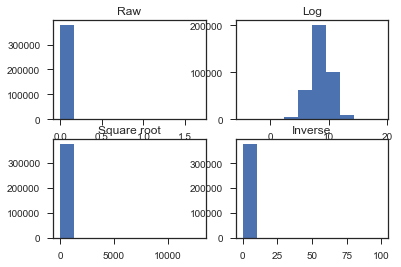

In [40]:
def makefour(jan, col):
    print(col)
    fig = plt.figure()
 
    fig.add_subplot(221)
    plt.hist(jan[col].dropna())
    plt.title('Raw')

    fig.add_subplot(222)
    plt.hist(np.log(jan[col].dropna()))
    plt.title('Log')

    fig.add_subplot(223)
    plt.hist(np.sqrt(jan[col].dropna()))
    plt.title('Square root')

    ax3=fig.add_subplot(224)
    plt.hist(1/jan[col].dropna())
    plt.title('Inverse')
    plt.show()
    
makefour(jan,'usd_goal_real') 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Index(['goal', 'pledged', 'backers', 'usd_pledged_real', 'usd_goal_real',
       'days_dur'],
      dtype='object')


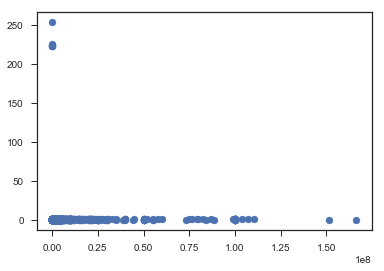

               goal       pledged       backers  usd_pledged_real  \
count  3.786610e+05  3.786610e+05  3.786610e+05      3.786610e+05   
mean   1.429864e-17 -2.142919e-17 -3.584041e-18     -3.261290e-17   
std    1.000001e+00  1.000001e+00  1.000001e+00      1.000001e+00   
min   -4.147474e-02 -1.012484e-01 -1.164235e-01     -9.957792e-02   
25%   -3.978469e-02 -1.009347e-01 -1.142188e-01     -9.923716e-02   
50%   -3.708059e-02 -9.476547e-02 -1.031957e-01     -9.271513e-02   
75%   -2.795427e-02 -5.862841e-02 -5.469396e-02     -5.505932e-02   
max    8.446154e+01  2.125698e+02  2.417111e+02      2.234716e+02   

       usd_goal_real      days_dur  
count   3.786610e+05  3.786610e+05  
mean    8.706781e-18  4.538222e-17  
std     1.000001e+00  1.000001e+00  
min    -3.942448e-02 -5.079895e-01  
25%    -3.768980e-02 -6.798944e-02  
50%    -3.465411e-02 -6.798944e-02  
75%    -2.598069e-02  3.821747e-02  
max     1.442527e+02  2.534479e+02  


In [41]:
from sklearn import preprocessing

# Select only numeric variables to scale.
df_num = jan.select_dtypes(include=[np.number], exclude='timedelta')
df_num.drop(labels=['ID', 'usd pledged','amt_pledged_per_backer'],axis=1, inplace=True)

# i dropped amt pledged per backer bc something was wrong with the values (i checked below 
# and they were registering as 'inf' which messed up the next step)

# Save the column names.
names=df_num.columns
print(names)

#names = ['goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real',
#       'usd_goal_real', 'amt_pledged_per_backer', 'days_dur']

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['usd_goal_real'], df_scaled['days_dur'])
plt.show()


print(df_scaled.describe())

In [42]:

import sklearn
# trying to filter to see which features are most useful 
from sklearn import feature_selection

sklearn.feature_selection.f_classif(features, jan[ 'state'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


(array([   150.07742269,    352.39300428,    142.49694987,    242.72209049,
           174.81246529,    318.30620249,    100.45857003,    392.431014  ,
           560.27313589,    106.08555202,   2386.1050105 ,     60.5504906 ,
           146.14787159,    976.11228167,    605.80942585,    912.78033357,
          3035.90209816,             inf,   4390.8205786 ,   3629.77088212,
           104.9747594 ,  13433.32534085,  20044.42502389,   1171.46800392]),
 array([  9.01461551e-160,   0.00000000e+000,   1.36730654e-151,
          8.69334116e-260,   1.80146775e-186,   0.00000000e+000,
          3.01133108e-106,   0.00000000e+000,   0.00000000e+000,
          2.58808499e-112,   0.00000000e+000,   2.72043430e-063,
          1.56989723e-155,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   4.07855674e-111,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000]))

In [43]:
#data = (x) 
#target = (y) 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Create an SelectKBest object to select features with k best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=5)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(features, jan['state'])

print('Original number of features:', features.shape[1])
print('Reduced number of features:', X_kbest.shape[1])


Original number of features: 24
Reduced number of features: 5


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


378661

In [49]:
# df_num.info() 
df_num.isnull().sum()

ID                        0
goal                      0
pledged                   0
backers                   0
usd_pledged_real          0
usd_goal_real             0
days_dur                  0
amt_pledged_per_backer    0
dtype: int64

In [51]:
np.isinf(df_num).sum()

ID                           0
goal                         0
pledged                      0
backers                      0
usd_pledged_real             0
usd_goal_real                0
days_dur                     0
amt_pledged_per_backer    3082
dtype: int64

In [ ]:
# usd_goal_5500_or_less, successful, 40+perbacker, 105backers+, art_cat